In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pymrmr
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 데이터 로드
URL = "/content/drive/MyDrive/SIL/WORK/DSS 머신러닝2/" # 데이터 위치 설정
data = df = pd.read_csv(URL+"data/Fault_data.csv",encoding="EUC-KR")

data.drop(["자재구분","END_DATE_TIME"],axis=1,inplace=True)
data.dropna(axis=1,inplace=True)

#X,Y 분할
Y=data["Y"].copy()
X=data.drop("Y",axis=1)
X


,CHAMBER,TAE.STDDEV0,TAE.MEAN0,TAE.RANGE0,PC.STDDEV0,PC.MEAN0,PC.RANGE0,CROT.STDDEV0,CROT.MEAN0,CROT.RANGE0,...,PC.RANGE12,TAE.STDDEV9,TAE.MEAN9,TAE.RANGE9,CROT.STDDEV9,CROT.MEAN9,CROT.RANGE9,PC.STDDEV9,PC.MEAN9,PC.RANGE9
0,4,0.044554,38.083127,0.254154,0.124753,0.044329,0.439883,0,35,0,...,17.350926,0.032832,35.011650,0.127077,0,35,0,0.405343,45.124841,3.079182
1,2,0.034801,38.052395,0.063538,0.177575,0.342131,0.439883,0,27,0,...,1.466280,0.020858,35.550245,0.063540,0,27,0,1.923012,45.350277,15.004887
2,3,0.030089,38.046407,0.127080,0.137559,0.063983,0.488759,0,15,0,...,13.098728,0.021635,36.013373,0.063538,0,15,0,0.161640,45.071393,0.977516
3,4,0.047904,38.090810,0.190617,1.441465,0.503421,6.549365,0,35,0,...,17.790812,0.025405,35.020727,0.127077,0,35,0,0.359273,45.110758,2.688171
4,3,0.036058,38.023829,0.190617,0.116419,0.045446,0.391007,0,58,0,...,3.714566,0.076083,33.967311,0.317697,0,58,0,0.447676,45.147192,3.225808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,3,0.027780,38.064804,0.063536,0.306206,0.342131,1.124145,0,65,0,...,10.117297,0.025479,36.533647,0.127079,0,65,0,0.325076,45.069147,3.176930
135,3,0.033961,38.077084,0.063536,0.163848,0.502723,0.488759,0,64,0,...,11.290322,0.033529,36.548598,0.127079,0,64,0,0.668920,45.131644,5.180838
136,3,0.031002,38.068007,0.063536,0.177190,0.481776,0.537634,0,64,0,...,3.567934,0.026805,36.535092,0.127079,0,64,0,0.613599,44.972303,4.985336
137,2,0.031002,38.068007,0.063536,0.170316,0.349113,0.439883,0,22,0,...,2.492667,0.038289,36.022728,0.127080,0,22,0,1.382720,45.285845,10.801564


In [ ]:
Y

0       69
1       28
2       13
3      101
4      319
      ... 
134     27
135     23
136     56
137     78
138     25
Name: Y, Length: 139, dtype: int64

In [ ]:
# 열 개수 출력
print("열 개수:", len(data.columns))

# 열 이름 출력
print("열 이름들:")
for column_name in data.columns:
    print(column_name)

열 개수: 137
열 이름들:
Y
CHAMBER
TAE.STDDEV0
TAE.MEAN0
TAE.RANGE0
PC.STDDEV0
PC.MEAN0
PC.RANGE0
CROT.STDDEV0
CROT.MEAN0
CROT.RANGE0
TAE.STDDEV1
TAE.MEAN1
TAE.RANGE1
CROT.STDDEV1
CROT.MEAN1
CROT.RANGE1
PC.STDDEV1
PC.MEAN1
PC.RANGE1
TAE.STDDEV13
TAE.MEAN13
TAE.RANGE13
PC.STDDEV13
PC.MEAN13
PC.RANGE13
CROT.STDDEV13
CROT.MEAN13
CROT.RANGE13
TAE.STDDEV5
TAE.MEAN5
TAE.RANGE5
CROT.STDDEV5
CROT.MEAN5
CROT.RANGE5
PC.STDDEV5
PC.MEAN5
PC.RANGE5
TAE.STDDEV3
TAE.MEAN3
TAE.RANGE3
PC.STDDEV3
PC.MEAN3
PC.RANGE3
CROT.STDDEV3
CROT.MEAN3
CROT.RANGE3
CROT.STDDEV11
CROT.MEAN11
CROT.RANGE11
TAE.STDDEV11
TAE.MEAN11
TAE.RANGE11
PC.STDDEV11
PC.MEAN11
PC.RANGE11
PC.STDDEV10
PC.MEAN10
PC.RANGE10
CROT.STDDEV10
CROT.MEAN10
CROT.RANGE10
TAE.STDDEV10
TAE.MEAN10
TAE.RANGE10
CROT.STDDEV2
CROT.MEAN2
CROT.RANGE2
TAE.STDDEV2
TAE.MEAN2
TAE.RANGE2
PC.STDDEV2
PC.MEAN2
PC.RANGE2
CROT.STDDEV7
CROT.MEAN7
CROT.RANGE7
TAE.STDDEV7
TAE.MEAN7
TAE.RANGE7
PC.STDDEV7
PC.MEAN7
PC.RANGE7
PC.STDDEV8
PC.MEAN8
PC.RANGE8
TAE.STDDEV8
TAE.MEAN8
TAE

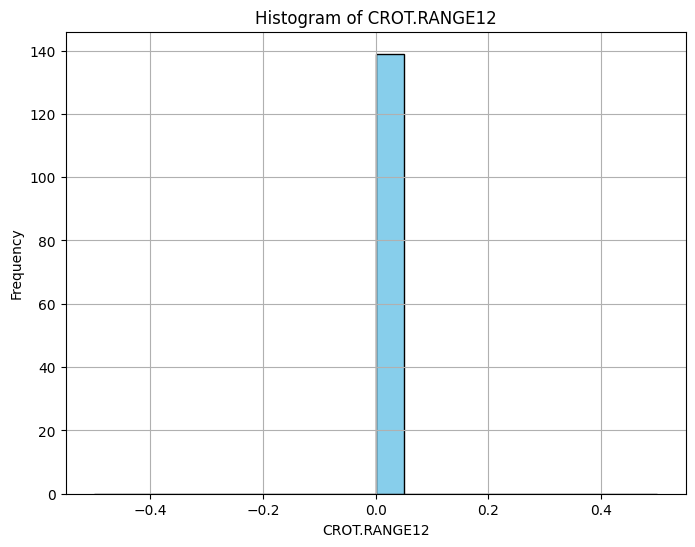

In [ ]:
# CROT.RANGE12 열의 데이터 가져오기
crot_range12_data = data['CROT.RANGE12']

# 히스토그램 그리기
plt.figure(figsize=(8, 6))
plt.hist(crot_range12_data, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of CROT.RANGE12')
plt.xlabel('CROT.RANGE12')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# 모든 열의 값이 동일한지 확인
columns_to_drop = []
for column in data.columns:
    if data[column].nunique() == 1:
        columns_to_drop.append(column)

# 삭제할 열 출력
print("삭제할 열:", columns_to_drop)

# 데이터프레임에서 열 삭제
data.drop(columns=columns_to_drop, inplace=True)

# 삭제된 열이 존재하는지 확인
if len(columns_to_drop) > 0:
    print("열이 삭제되었습니다.")
else:
    print("동일한 값을 가진 열이 없습니다.")

삭제할 열: ['CROT.STDDEV0', 'CROT.RANGE0', 'CROT.STDDEV1', 'CROT.RANGE1', 'CROT.STDDEV13', 'CROT.RANGE13', 'CROT.STDDEV5', 'CROT.RANGE5', 'CROT.STDDEV11', 'CROT.RANGE11', 'CROT.STDDEV10', 'CROT.RANGE10', 'CROT.STDDEV7', 'CROT.RANGE7', 'CROT.STDDEV14', 'CROT.RANGE14', 'CROT.STDDEV12', 'CROT.RANGE12', 'CROT.STDDEV9', 'CROT.RANGE9']
열이 삭제되었습니다.


In [ ]:
# 열 개수 출력
print("열 개수:", len(data.columns))

열 개수: 117


In [ ]:
data

,Y,CHAMBER,TAE.STDDEV0,TAE.MEAN0,TAE.RANGE0,PC.STDDEV0,PC.MEAN0,PC.RANGE0,CROT.MEAN0,TAE.STDDEV1,...,PC.STDDEV12,PC.MEAN12,PC.RANGE12,TAE.STDDEV9,TAE.MEAN9,TAE.RANGE9,CROT.MEAN9,PC.STDDEV9,PC.MEAN9,PC.RANGE9
0,69,4,0.044554,38.083127,0.254154,0.124753,0.044329,0.439883,35,0.121240,...,3.821034,57.645580,17.350926,0.032832,35.011650,0.127077,35,0.405343,45.124841,3.079182
1,28,2,0.034801,38.052395,0.063538,0.177575,0.342131,0.439883,27,0.115462,...,0.303504,56.613882,1.466280,0.020858,35.550245,0.063540,27,1.923012,45.350277,15.004887
2,13,3,0.030089,38.046407,0.127080,0.137559,0.063983,0.488759,15,0.119149,...,2.845739,57.296468,13.098728,0.021635,36.013373,0.063538,15,0.161640,45.071393,0.977516
3,101,4,0.047904,38.090810,0.190617,1.441465,0.503421,6.549365,35,0.128293,...,3.618665,57.286946,17.790812,0.025405,35.020727,0.127077,35,0.359273,45.110758,2.688171
4,319,3,0.036058,38.023829,0.190617,0.116419,0.045446,0.391007,58,0.131875,...,0.769093,56.349419,3.714566,0.076083,33.967311,0.317697,58,0.447676,45.147192,3.225808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,27,3,0.027780,38.064804,0.063536,0.306206,0.342131,1.124145,65,0.101123,...,2.108977,57.082555,10.117297,0.025479,36.533647,0.127079,65,0.325076,45.069147,3.176930
135,23,3,0.033961,38.077084,0.063536,0.163848,0.502723,0.488759,64,0.096061,...,2.303813,57.124767,11.290322,0.033529,36.548598,0.127079,64,0.668920,45.131644,5.180838
136,56,3,0.031002,38.068007,0.063536,0.177190,0.481776,0.537634,64,0.093249,...,0.768800,56.391629,3.567934,0.026805,36.535092,0.127079,64,0.613599,44.972303,4.985336
137,78,2,0.031002,38.068007,0.063536,0.170316,0.349113,0.439883,22,0.093526,...,0.507711,56.797818,2.492667,0.038289,36.022728,0.127080,22,1.382720,45.285845,10.801564


In [ ]:
# X, Y 분할
Y = data["Y"].copy()
X = data.drop("Y", axis=1)
data_for_mRMR=X.copy()
data_for_mRMR['Y']=Y

# Train/Test 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=22, shuffle=True)



In [ ]:
data

,Y,CHAMBER,TAE.STDDEV0,TAE.MEAN0,TAE.RANGE0,PC.STDDEV0,PC.MEAN0,PC.RANGE0,CROT.MEAN0,TAE.STDDEV1,...,PC.STDDEV12,PC.MEAN12,PC.RANGE12,TAE.STDDEV9,TAE.MEAN9,TAE.RANGE9,CROT.MEAN9,PC.STDDEV9,PC.MEAN9,PC.RANGE9
0,69,4,0.044554,38.083127,0.254154,0.124753,0.044329,0.439883,35,0.121240,...,3.821034,57.645580,17.350926,0.032832,35.011650,0.127077,35,0.405343,45.124841,3.079182
1,28,2,0.034801,38.052395,0.063538,0.177575,0.342131,0.439883,27,0.115462,...,0.303504,56.613882,1.466280,0.020858,35.550245,0.063540,27,1.923012,45.350277,15.004887
2,13,3,0.030089,38.046407,0.127080,0.137559,0.063983,0.488759,15,0.119149,...,2.845739,57.296468,13.098728,0.021635,36.013373,0.063538,15,0.161640,45.071393,0.977516
3,101,4,0.047904,38.090810,0.190617,1.441465,0.503421,6.549365,35,0.128293,...,3.618665,57.286946,17.790812,0.025405,35.020727,0.127077,35,0.359273,45.110758,2.688171
4,319,3,0.036058,38.023829,0.190617,0.116419,0.045446,0.391007,58,0.131875,...,0.769093,56.349419,3.714566,0.076083,33.967311,0.317697,58,0.447676,45.147192,3.225808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,27,3,0.027780,38.064804,0.063536,0.306206,0.342131,1.124145,65,0.101123,...,2.108977,57.082555,10.117297,0.025479,36.533647,0.127079,65,0.325076,45.069147,3.176930
135,23,3,0.033961,38.077084,0.063536,0.163848,0.502723,0.488759,64,0.096061,...,2.303813,57.124767,11.290322,0.033529,36.548598,0.127079,64,0.668920,45.131644,5.180838
136,56,3,0.031002,38.068007,0.063536,0.177190,0.481776,0.537634,64,0.093249,...,0.768800,56.391629,3.567934,0.026805,36.535092,0.127079,64,0.613599,44.972303,4.985336
137,78,2,0.031002,38.068007,0.063536,0.170316,0.349113,0.439883,22,0.093526,...,0.507711,56.797818,2.492667,0.038289,36.022728,0.127080,22,1.382720,45.285845,10.801564


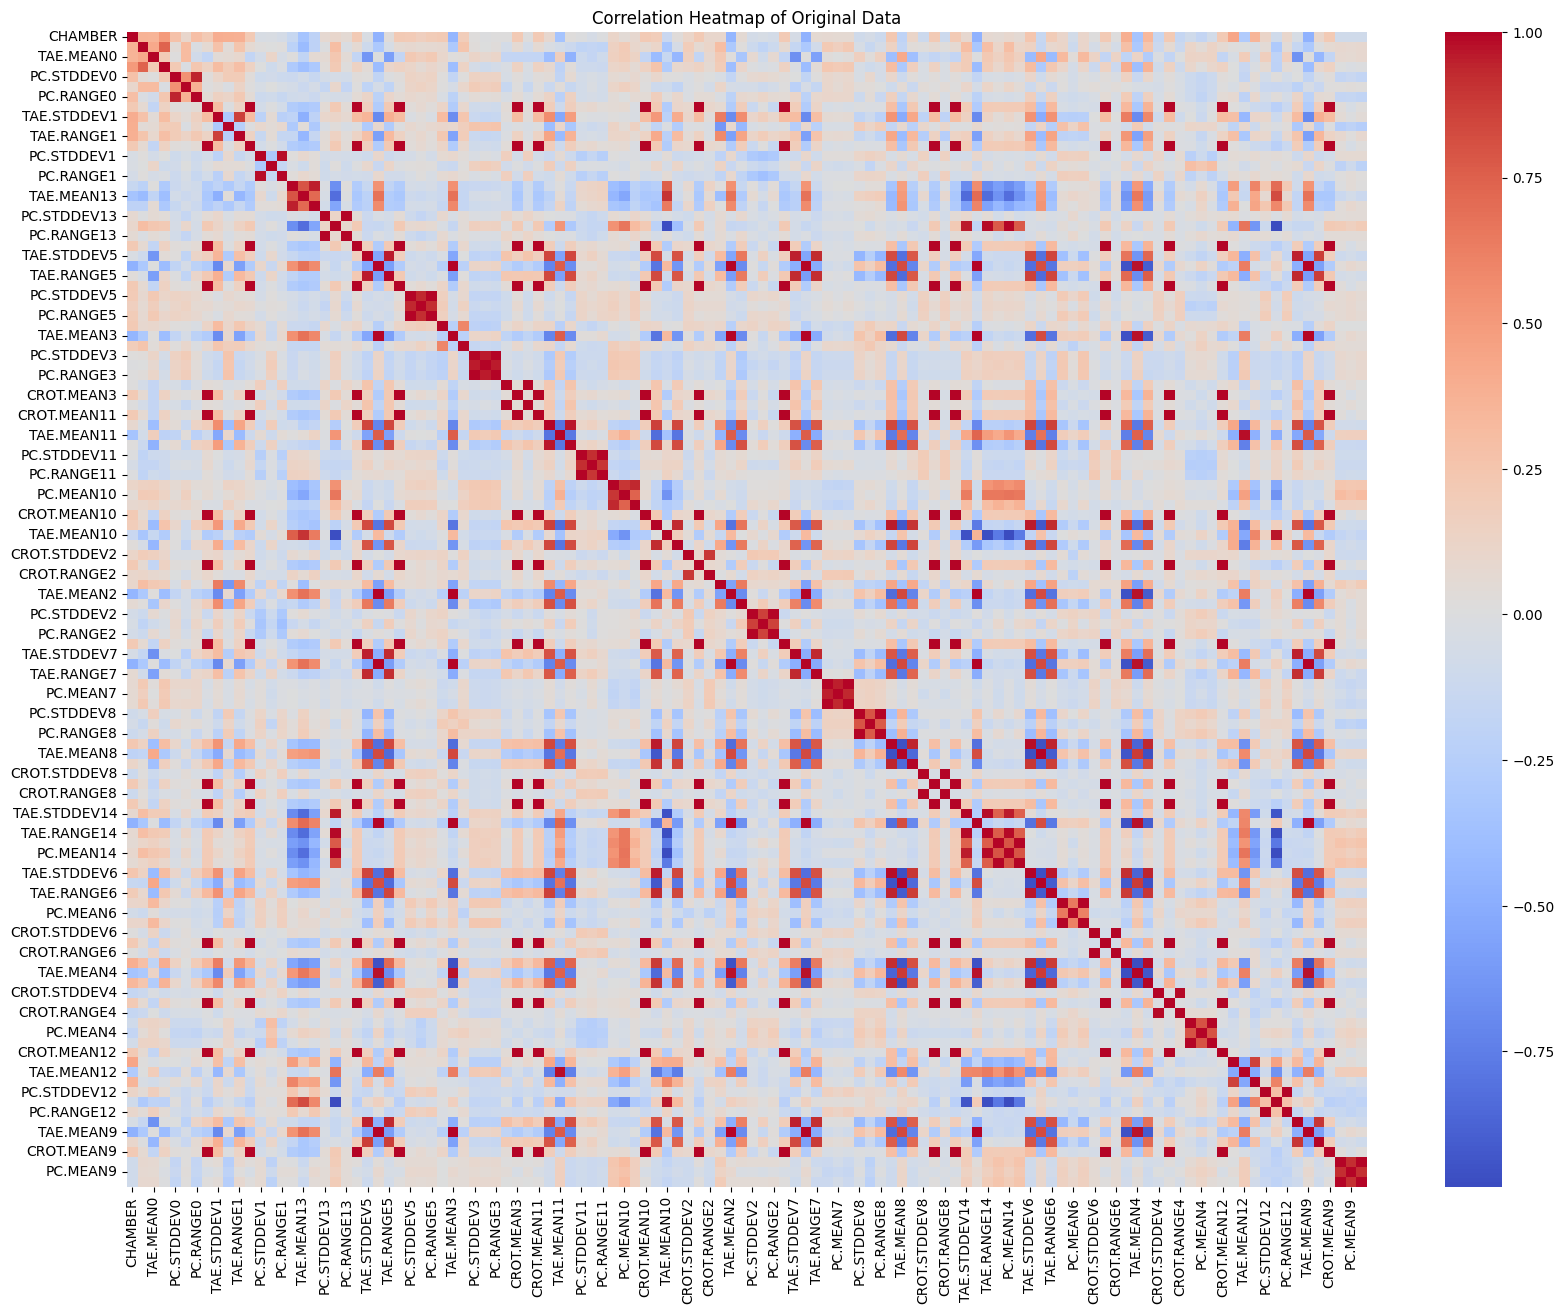

In [ ]:
# 원본 데이터 X의 상관계수 히트맵
plt.figure(figsize=(20, 15))
sns.heatmap(X_train.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Original Data')
plt.show()

# mRMR
* 장점
  * 𝑋들 간의 다중공선성을 제거하여 예측의 안정성 확보(학습 데이터가 변해도 학습 파라미터의 변동이 크지않음)
  * 따라서 다중공선성이 클 때 유리
* 단점
  * 상관계수를 사용시 𝑋와 𝑌의 선형 관계만 고려
  * 만일 상호 정보량을사용할 수 있다면비선형 관계도 반영 가능


In [ ]:
# !pip install pymrmr

In [ ]:
# mRMR을 사용한 변수 중요도 추출
# mRMR은 출력변수를 dataFrame의 마지막 열로 인식하므로, 사용하기전에 데이터프레임의 마지막 열에 출력변수가 위치하는지 확인하는것이 중요함
# mRMR을 위해 데이터 결합 (pymrmr은 DataFrame을 인자로 받음)
X_train_with_target = X_train.copy()
X_train_with_target['Y'] = Y_train


In [ ]:
X_train_with_target

,CHAMBER,TAE.STDDEV0,TAE.MEAN0,TAE.RANGE0,PC.STDDEV0,PC.MEAN0,PC.RANGE0,CROT.MEAN0,TAE.STDDEV1,TAE.MEAN1,...,PC.MEAN12,PC.RANGE12,TAE.STDDEV9,TAE.MEAN9,TAE.RANGE9,CROT.MEAN9,PC.STDDEV9,PC.MEAN9,PC.RANGE9,Y
42,4,0.066506,38.110245,0.254155,1.153375,0.554885,4.887586,1,0.109951,38.060856,...,56.324980,4.398826,0.024484,35.016864,0.127077,1,0.454912,45.131796,3.372437,10
50,2,0.031005,38.102319,0.063541,0.154191,0.370060,0.439883,54,0.111454,38.025514,...,56.725318,3.812317,0.038910,35.560774,0.190617,54,0.923855,45.235847,6.451614,23
31,2,0.025941,38.094754,0.063541,0.177575,0.293255,0.439883,16,0.121667,38.020626,...,56.514744,3.470183,0.028524,35.547807,0.127080,16,0.814671,45.191113,6.256108,240
107,4,0.031783,38.076531,0.190612,0.374158,0.083643,2.541544,28,0.113524,38.050732,...,57.791256,18.914960,0.027773,35.534440,0.127080,28,1.647753,45.332356,11.925709,38
26,2,0.036685,38.084164,0.127079,0.171315,0.363078,0.488759,4,0.109951,38.016088,...,56.873167,4.398826,0.028154,35.559140,0.063540,4,1.946761,45.368198,14.956014,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,3,0.039289,38.091270,0.127078,0.169702,0.100467,0.391007,28,0.112740,38.033783,...,56.313872,5.376340,0.033668,36.013806,0.127076,28,0.336297,45.108408,3.030305,28
100,2,0.044714,38.066796,0.127077,0.532041,0.436624,1.906158,6,0.096521,38.049852,...,57.637385,18.084064,0.027608,36.540486,0.063542,6,0.279455,45.028746,2.394916,38
44,4,0.051878,38.107754,0.127075,0.162593,0.325839,0.439883,20,0.116450,38.050732,...,57.524660,17.644181,0.021044,35.023320,0.063540,20,0.386704,45.137266,2.834801,26
132,4,0.029412,38.113048,0.063538,0.200246,0.232160,0.439883,66,0.108222,38.056318,...,57.286947,12.316714,0.029588,35.543301,0.063540,66,0.199361,45.062711,1.710653,115


Selected features: ['CROT.MEAN6', 'TAE.MEAN3', 'PC.STDDEV0', 'CROT.RANGE6', 'TAE.MEAN1', 'PC.MEAN5', 'PC.RANGE14', 'CROT.RANGE4', 'CROT.RANGE8', 'TAE.MEAN2', 'CROT.RANGE2', 'TAE.MEAN11', 'CROT.MEAN2', 'PC.MEAN0']


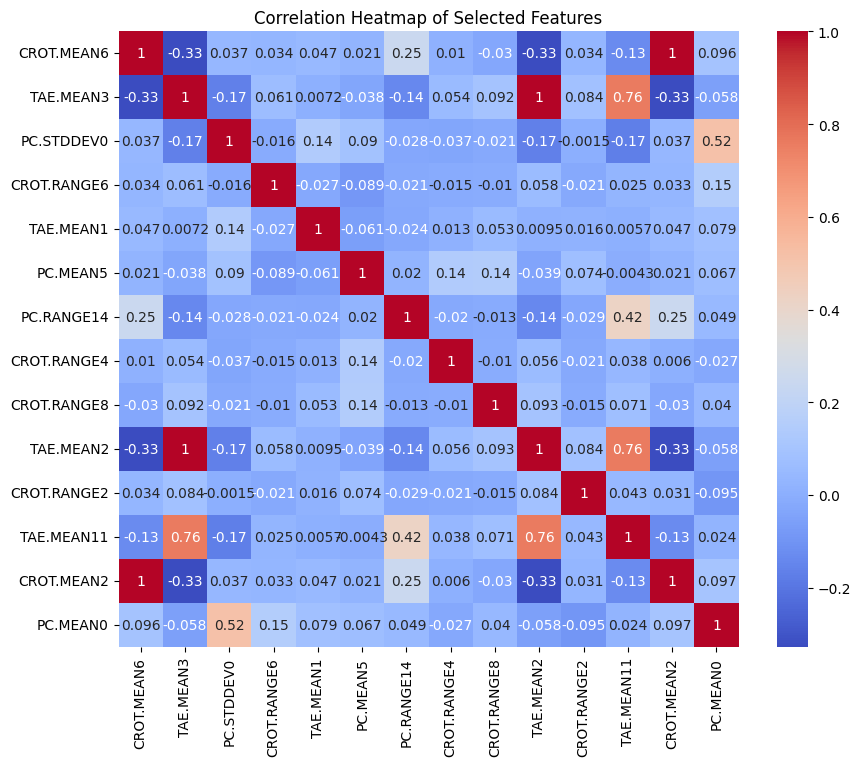

In [ ]:
# 선택할 특징의 개수는 14로 설정
selected_features = pymrmr.mRMR(X_train_with_target, 'MIQ', 14)

print("Selected features:", selected_features)

# 선택된 특성들만 포함한 데이터 프레임 생성
selected_X = X[selected_features]
# 선택된 특성의 상관계수 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(selected_X.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Selected Features')
plt.show()


#All but X
* 장점
  * 예측 모델을 사용하므로 𝑋와 𝑌의 비선형 관계도반영
  * 다중공선성이 작을 때 유리
* 단점
  * 다중공선성을 고려하지 못하여 중복된 𝑋변수가 선택(관리 인자 파악시 유리)
  * 변수 선택 시간이 오래 걸림

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score

## RandomForest로 모델 선택했을시

In [ ]:
# Baseline 모델 학습 및 평가
baseline_model = RandomForestRegressor(random_state=7)
baseline_model.fit(X_train, Y_train)
baseline_predictions = baseline_model.predict(X_test)
baseline_accuracy = mean_squared_error(Y_test, baseline_predictions)

print(f"Baseline Model Accuracy (MSE): {baseline_accuracy}")

Baseline Model Accuracy (MSE): 1616.89935


In [ ]:
# "All But X" 알고리즘 적용
selected_features = X.columns.tolist()

for feature in X.columns:
    # 현재 feature를 제외한 데이터셋 생성
    X_train_temp = X_train.drop(columns=[feature])
    X_test_temp = X_test.drop(columns=[feature])

    # 모델 학습 및 평가
    model = RandomForestRegressor(random_state=7)
    model.fit(X_train_temp, Y_train)
    predictions = model.predict(X_test_temp)
    accuracy = mean_squared_error(Y_test, predictions)

    print(f"Accuracy without '{feature}' (MSE): {accuracy}")

    # 정확도 비교
    if accuracy >= baseline_accuracy:
        print(f"Removing '{feature}' improves accuracy. Removing it.")
        selected_features.remove(feature)
    else:
        print(f"Keeping '{feature}'.")

# 최종 선택된 변수들
print(f"Selected features: {selected_features}")

Accuracy without 'CHAMBER' (MSE): 1641.4047035714286
Removing 'CHAMBER' improves accuracy. Removing it.
Accuracy without 'TAE.STDDEV0' (MSE): 1673.338360714286
Removing 'TAE.STDDEV0' improves accuracy. Removing it.
Accuracy without 'TAE.MEAN0' (MSE): 1699.3352178571429
Removing 'TAE.MEAN0' improves accuracy. Removing it.
Accuracy without 'TAE.RANGE0' (MSE): 1579.2647892857146
Keeping 'TAE.RANGE0'.
Accuracy without 'PC.STDDEV0' (MSE): 1577.7737714285718
Keeping 'PC.STDDEV0'.
Accuracy without 'PC.MEAN0' (MSE): 1561.3289178571433
Keeping 'PC.MEAN0'.
Accuracy without 'PC.RANGE0' (MSE): 1620.8820892857143
Removing 'PC.RANGE0' improves accuracy. Removing it.
Accuracy without 'CROT.MEAN0' (MSE): 1654.3911071428572
Removing 'CROT.MEAN0' improves accuracy. Removing it.
Accuracy without 'TAE.STDDEV1' (MSE): 1652.894882142857
Removing 'TAE.STDDEV1' improves accuracy. Removing it.
Accuracy without 'TAE.MEAN1' (MSE): 1549.6410857142855
Keeping 'TAE.MEAN1'.
Accuracy without 'TAE.RANGE1' (MSE): 1639.

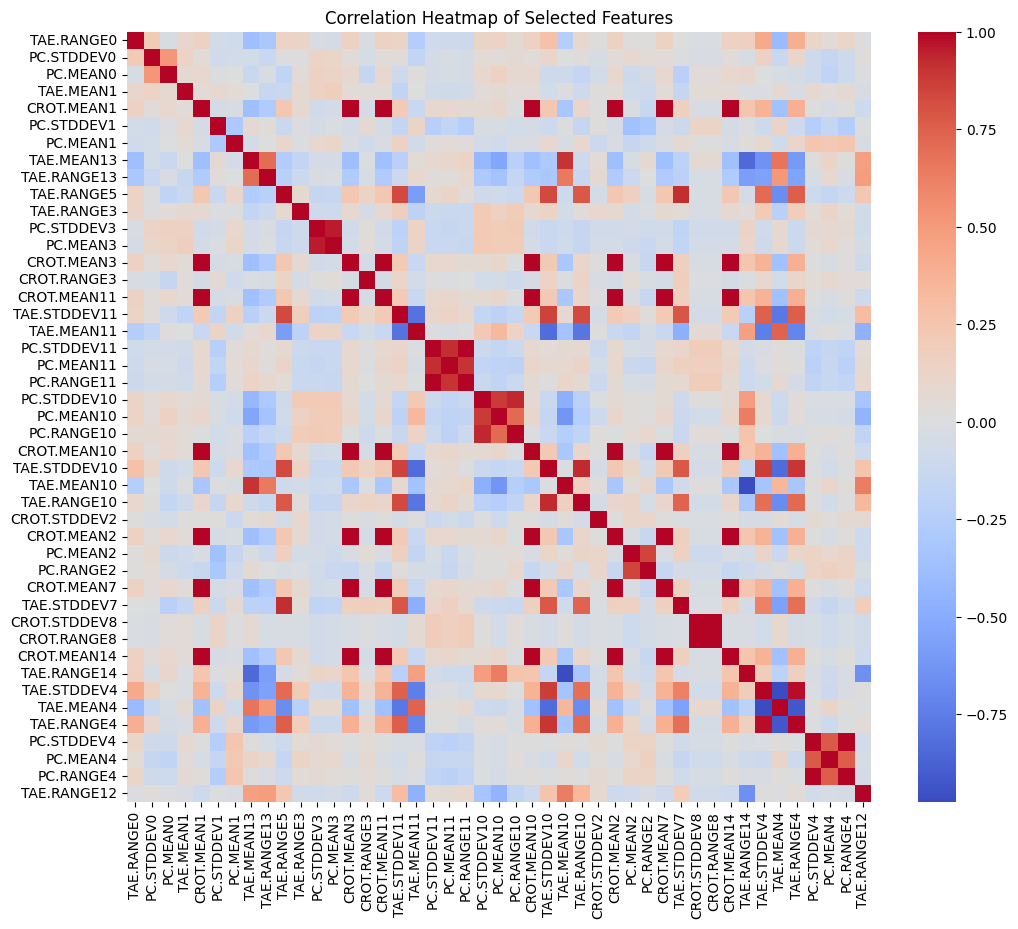

In [ ]:
# 선택된 변수들로 데이터셋 구성
X_selected = X[selected_features]

# 상관계수 행렬 계산
corr_matrix = X_selected.corr()

# Heatmap 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Selected Features')
plt.show()

## 선택 및 새로 생성된 변수 활용방법
* mRMR, All but X, Boruta 등과 같은 변수(특징) 선택 기법론은 Train data에서 선택된 변수를 Test data에서도 동일하게 선택하여 실험을 진행함
* PCA와 같은 차원축소기법으로 생성된 변수들은  Train data를 바탕으로 차원을 축소하는데 사용된 모델을 Test data에도 동일하게 적용해주어야함

# PCA
* PCA는 변수 간의 분산을 기반으로 주성분을 찾기 때문에, 변수의 스케일이 다르면 특정 변수가 분석 결과에 과도하게 영향을 미칠 수 있으므로 스케일링을 꼭 진행해주어야함

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train

,CHAMBER,TAE.STDDEV0,TAE.MEAN0,TAE.RANGE0,PC.STDDEV0,PC.MEAN0,PC.RANGE0,CROT.MEAN0,TAE.STDDEV1,TAE.MEAN1,...,PC.STDDEV12,PC.MEAN12,PC.RANGE12,TAE.STDDEV9,TAE.MEAN9,TAE.RANGE9,CROT.MEAN9,PC.STDDEV9,PC.MEAN9,PC.RANGE9
42,4,0.066506,38.110245,0.254155,1.153375,0.554885,4.887586,1,0.109951,38.060856,...,0.915709,56.324980,4.398826,0.024484,35.016864,0.127077,1,0.454912,45.131796,3.372437
50,2,0.031005,38.102319,0.063541,0.154191,0.370060,0.439883,54,0.111454,38.025514,...,0.584811,56.725318,3.812317,0.038910,35.560774,0.190617,54,0.923855,45.235847,6.451614
31,2,0.025941,38.094754,0.063541,0.177575,0.293255,0.439883,16,0.121667,38.020626,...,0.705557,56.514744,3.470183,0.028524,35.547807,0.127080,16,0.814671,45.191113,6.256108
107,4,0.031783,38.076531,0.190612,0.374158,0.083643,2.541544,28,0.113524,38.050732,...,4.052633,57.791256,18.914960,0.027773,35.534440,0.127080,28,1.647753,45.332356,11.925709
26,2,0.036685,38.084164,0.127079,0.171315,0.363078,0.488759,4,0.109951,38.016088,...,0.846286,56.873167,4.398826,0.028154,35.559140,0.063540,4,1.946761,45.368198,14.956014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,3,0.039289,38.091270,0.127078,0.169702,0.100467,0.391007,28,0.112740,38.033783,...,1.129307,56.313872,5.376340,0.033668,36.013806,0.127076,28,0.336297,45.108408,3.030305
100,2,0.044714,38.066796,0.127077,0.532041,0.436624,1.906158,6,0.096521,38.049852,...,3.754810,57.637385,18.084064,0.027608,36.540486,0.063542,6,0.279455,45.028746,2.394916
44,4,0.051878,38.107754,0.127075,0.162593,0.325839,0.439883,20,0.116450,38.050732,...,3.752118,57.524660,17.644181,0.021044,35.023320,0.063540,20,0.386704,45.137266,2.834801
132,4,0.029412,38.113048,0.063538,0.200246,0.232160,0.439883,66,0.108222,38.056318,...,2.594606,57.286947,12.316714,0.029588,35.543301,0.063540,66,0.199361,45.062711,1.710653


In [ ]:
#변수 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
# PCA 수행
pca = PCA()
X_pca = pca.fit_transform(X_train_scaled)

# 분산 설명 비율
pve = pca.explained_variance_ratio_

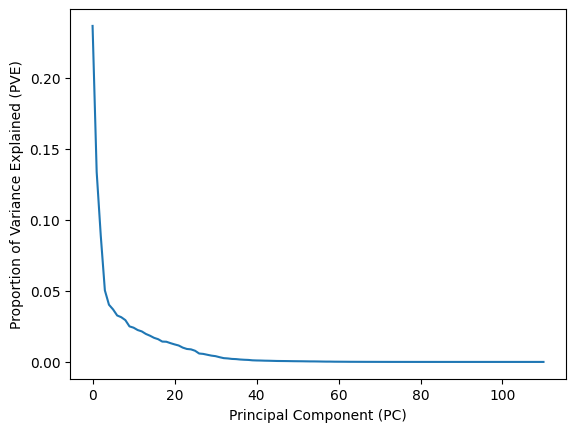

In [ ]:
# scree plot
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component (PC)')
plt.ylabel('Proportion of Variance Explained (PVE)')
plt.show()

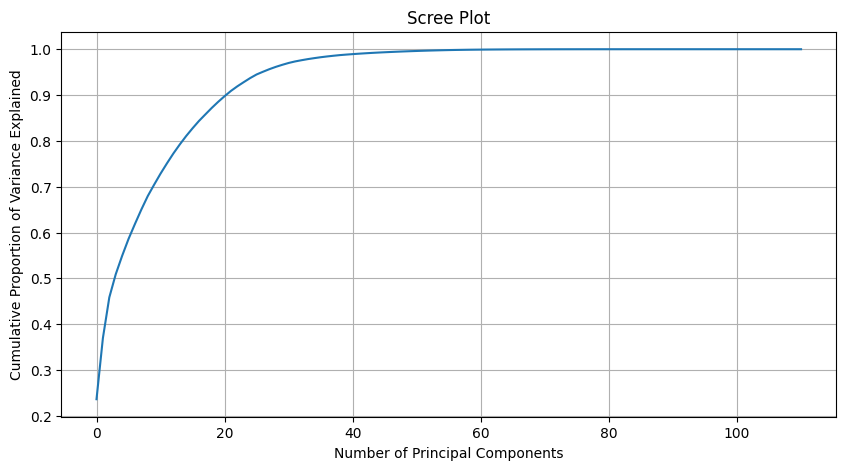

In [ ]:
# 분산 설명 비율의 누적 Scree plot
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pve))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [ ]:
X_st = pd.DataFrame(X_train_scaled, columns=X.columns)
score = pca.transform(X_st)
pd.DataFrame(score)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,101,102,103,104,105,106,107,108,109,110
0,-1.697059,-3.649346,4.726195,3.780497,2.389975,-3.325439,1.646989,-1.139499,1.586468,2.381404,...,5.670388e-16,2.855050e-16,-3.725448e-16,-1.054009e-15,6.443392e-16,2.605773e-16,-6.225035e-16,-6.718061e-17,-4.116361e-16,-8.696926e-17
1,-0.202518,0.838752,-0.981284,0.102274,0.417114,4.757122,-3.023393,3.159420,4.226480,-0.259679,...,-1.965638e-15,-9.677018e-16,2.395480e-16,1.644087e-15,-1.255260e-15,2.244878e-16,2.270134e-16,9.690245e-16,1.481119e-16,1.278589e-16
2,-2.454422,-2.640652,2.495215,-1.035304,-3.237337,0.198561,-0.938375,0.181524,-1.026888,-1.755121,...,6.565853e-16,-1.713622e-17,-8.560774e-16,-1.651779e-15,9.454871e-16,3.052275e-16,9.385665e-16,5.316823e-16,-3.053785e-16,-7.337939e-16
3,-2.211830,-1.782135,0.288079,3.163999,2.838677,0.922144,-0.115040,-0.891145,0.893721,0.418468,...,1.928527e-16,5.024894e-16,-1.956148e-17,-3.943615e-16,2.429395e-16,-7.218490e-16,-4.947893e-16,6.677084e-16,6.409211e-17,7.330193e-16
4,-4.224944,-3.075222,3.357642,0.420387,-0.926190,1.458972,1.095206,-1.912135,1.945624,3.446895,...,1.183348e-17,1.889572e-16,-4.787548e-16,-1.872209e-15,6.338680e-16,-4.097884e-16,3.795934e-17,1.811862e-16,-4.301012e-16,-5.171678e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-2.671307,-2.221799,-0.420751,-0.381512,-1.676741,1.569007,0.097235,-0.404951,-0.064607,-2.260032,...,-1.343160e-16,1.762773e-17,5.520271e-17,-6.270961e-16,-2.217139e-17,-1.094289e-16,-2.979351e-16,-3.476192e-16,-3.421644e-16,4.660391e-17
107,-6.896749,-2.368143,1.600211,-1.020798,1.761771,-4.828167,-2.635625,-0.685670,0.081970,1.469614,...,2.405479e-16,6.460623e-16,-5.654093e-16,-9.480020e-16,6.857853e-16,5.785849e-16,5.816932e-17,-6.073706e-18,-3.673817e-16,-8.070423e-17
108,-1.043414,-2.165023,2.970306,2.306950,-1.248323,0.762366,-0.381066,0.538461,-0.182219,-1.379659,...,7.061114e-16,-3.538186e-17,-8.350060e-16,-4.710124e-16,-4.542877e-16,5.501851e-16,5.620234e-17,-3.166192e-16,-6.109254e-16,-1.228494e-16
109,-0.378117,1.439123,-3.044945,0.436852,-0.238728,-1.110661,1.564470,-0.061515,-0.959582,-2.045954,...,-1.664581e-16,-2.181224e-17,4.697077e-16,-2.180827e-16,-9.288489e-16,1.650044e-16,-1.070232e-17,5.881397e-16,-3.489187e-16,-1.578980e-17


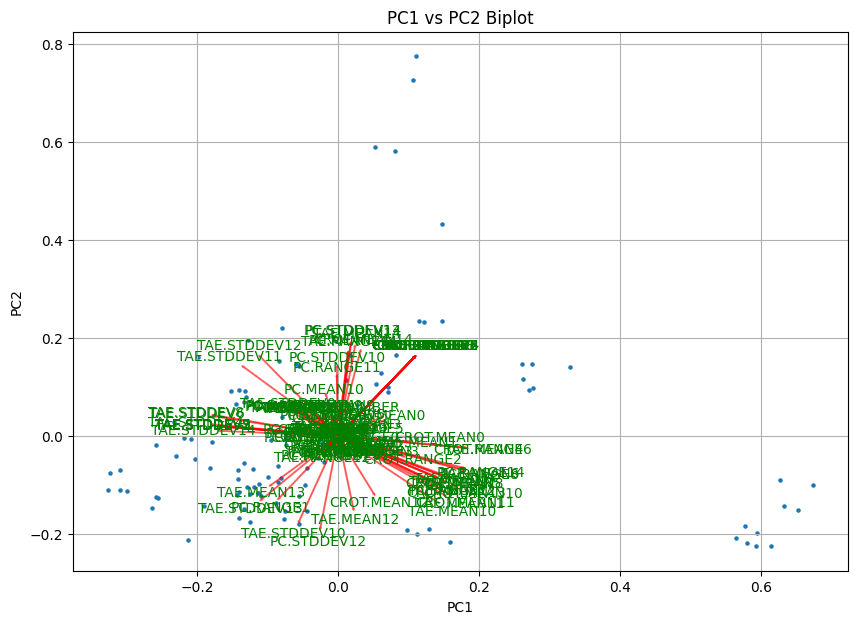

In [ ]:
# Biplot 함수 정의
def biplot(score, coeff, labels=None):
    xs = score[:,0]  # 첫 번째 주성분의 스코어
    ys = score[:,1]  # 두 번째 주성분의 스코어
    n = coeff.shape[0]  # 변수의 개수
    scalex = 1.0/(xs.max() - xs.min())  # 스코어의 x축 스케일
    scaley = 1.0/(ys.max() - ys.min())  # 스코어의 y축 스케일

    plt.scatter(xs * scalex, ys * scaley, s=5)  # 스케일된 스코어 시각화
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)  # 변수 벡터 시각화
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "변수"+str(i+1), color='g', ha='center', va='center')  # 변수 레이블
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center')  # 변수 레이블

    plt.xlabel("PC1")  # x축 레이블 설정
    plt.ylabel("PC2")  # y축 레이블 설정
    plt.grid()  # 격자선 추가

# PC1과 PC2의 Biplot 그리기
plt.figure(figsize=(10, 7))  # 그래프 크기 설정
biplot(X_pca, pca.components_.T, labels=df.columns[:-1])  # Biplot 시각화
plt.title('PC1 vs PC2 Biplot')  # 그래프 제목 설정
plt.show()  # 그래프 출력

## 데이터분석에 PCA를 활용하기 위한 절차

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

pca_model = PCA(n_components=40)

In [ ]:
pca_model.fit(X_train_scaled)

PCA(n_components=40)

In [ ]:
X_train_pca = pca_model.transform(X_train_scaled)
X_test_pca = pca_model.transform(X_test_scaled)

In [ ]:
exp_var_pca = pca_model.explained_variance_ratio_
exp_var_pca

array([0.23627887, 0.13355709, 0.08872118, 0.05030549, 0.04021797,
       0.0369203 , 0.03266871, 0.03144262, 0.02938797, 0.02499673,
       0.02408582, 0.02242655, 0.02146643, 0.0196787 , 0.0184376 ,
       0.01693945, 0.01597903, 0.01431315, 0.01419489, 0.0132083 ,
       0.01232433, 0.01155056, 0.01006347, 0.00911199, 0.00883272,
       0.00785677, 0.0059129 , 0.00563661, 0.00502063, 0.00443031,
       0.00405139, 0.00330827, 0.00265873, 0.00244935, 0.00211056,
       0.00198435, 0.00169897, 0.00152201, 0.00140394, 0.00113233])

In [ ]:
exp_var_pca.sum()

0.9882870399584369

In [ ]:
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

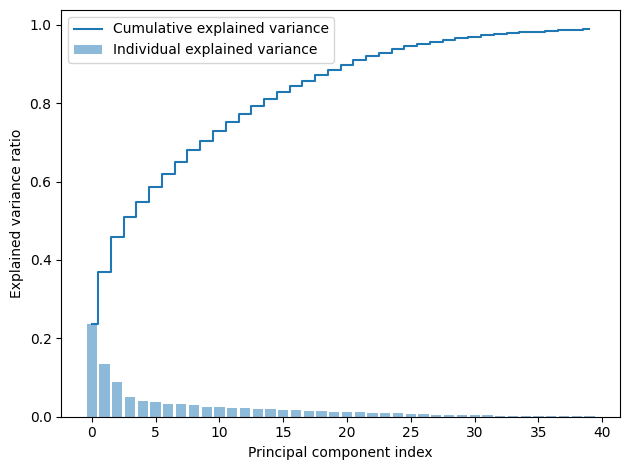

In [ ]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()